In [1]:
import numpy as np
from matplotlib import pyplot as plt

import sys
sys.path.append('../')
from digitization_to_segy import Reader, Preparer, Processing, PostProcessing, Saver
sys.path.remove('../')

In [2]:
img = Reader.read_png('data/test.png')

In [3]:
cut_data = Preparer.getSeismicRGB(img, 1, 1)

In [4]:
data, cmap = Processing.rgb_to_amplitude(cut_data, 'basic_petrel')

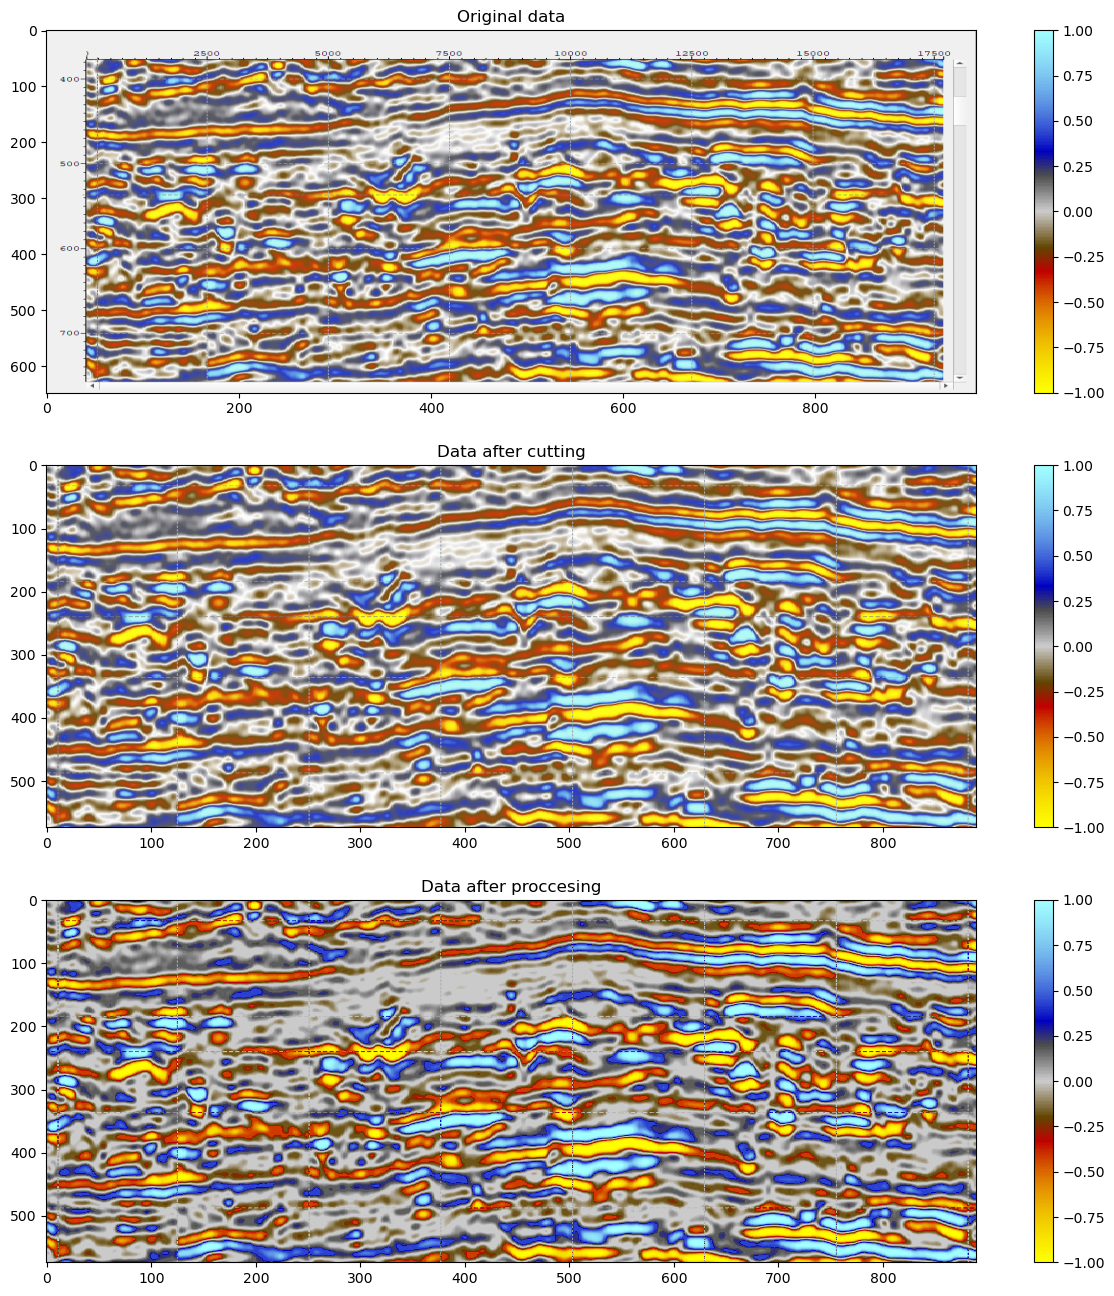

In [5]:
fig, axs = plt.subplots(3, 1, figsize=(15, 16))
im1 = axs[0].imshow(img, cmap=cmap, aspect='auto', vmin=-1, vmax=1)
im2 = axs[1].imshow(cut_data, cmap=cmap, aspect='auto', vmin=-1, vmax=1)
im3 = axs[2].imshow(data, cmap=cmap, aspect='auto', vmin=-1, vmax=1)

axs[0].set_title('Original data')
axs[1].set_title('Data after cutting')
axs[2].set_title('Data after proccesing')
fig.colorbar(im1)
fig.colorbar(im2)
fig.colorbar(im3)

In [6]:
data_res = PostProcessing.resize_array(data=data, trace_count=1000, n_samples=1600)

In [8]:
Saver.save_segy('data/my_segy', np.float32(data_res.T))